In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('train.csv')
train_data = np.array(train_data)
test_data = pd.read_csv('test.csv')
test_data = np.array(test_data)

In [43]:
m, n = train_data.shape

Y_train = train_data.T[0]
X_train = train_data.T[1:] / 255

Y_test = test_data.T[0]
X_test = test_data.T[1:] / 255

In [44]:
def init_params():
    weight_1 = np.random.rand(10, 784) - 0.5
    bias_1 = np.random.rand(10, 1) - 0.5
    weight_2 = np.random.rand(10, 10) - 0.5
    bias_2 = np.random.rand(10, 1) - 0.5
    return weight_1, bias_1, weight_2, bias_2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A =  np.exp(Z) / sum(np.exp(Z))
    return A

def forward_pass(weight_1, bias_1, weight_2, bias_2, X):
    Z_1 = weight_1.dot(X) + bias_1
    A_1 = ReLU(Z_1)
    Z_2 = weight_2.dot(A_1) + bias_2
    A_2 = softmax(Z_2)
    return Z_1, A_1, Z_2, A_2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def deriv_ReLU(Z):
    return Z > 0

def backwards_pass(Z_1, A_1, Z_2, A_2, weight_1, weight_2, X, Y):
    one_hot_Y = one_hot(Y)
    der_Z_2 = A_2 - one_hot_Y
    der_weight_2 = 1 / m * der_Z_2.dot(A_1.T)
    der_bias_2 = 1 / m * np.sum(der_Z_2)
    der_Z_1 = weight_2.T.dot(der_Z_2) * deriv_ReLU(Z_1)
    der_weight_1 = 1 / m * der_Z_1.dot(X.T)
    der_bias_1 = 1 / m * np.sum(der_Z_1)
    return der_weight_1, der_bias_1, der_weight_2, der_bias_2

def update_params(weight_1, bias_1, weight_2, bias_2, der_weight_1, der_bias_1, der_weight_2, der_bias_2, rate):
    weight_1 = weight_1 - rate * der_weight_1
    bias_1 = bias_1 - rate * der_bias_1
    weight_2 = weight_2 - rate * der_weight_2
    bias_2 = bias_2 - rate * der_bias_2
    return weight_1, bias_1, weight_2, bias_2

In [52]:
def predictions(A_2):
    return np.argmax(A_2, 0)

def accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, learning_rate, epochs):
    weight_1, bias_1, weight_2, bias_2 = init_params()
    eps = []
    accs = []
    for e in range(epochs):
        Z_1, A_1, Z_2, A_2 = forward_pass(weight_1, bias_1, weight_2, bias_2, X)
        der_weight_1, der_bias_1, der_weight_2, der_bias_2 = backwards_pass(Z_1, A_1, Z_2, A_2, weight_1, weight_2, X, Y)
        weight_1, bias_1, weight_2, bias_2 = update_params(weight_1, bias_1, weight_2, bias_2, der_weight_1, der_bias_1, der_weight_2, der_bias_2, learning_rate)
        if e % 50 == 0:
            print("Epoch: ", e)
            acc = accuracy(predictions(A_2), Y)
            print("Accuracy: ", acc)
            eps += [e]
            accs += [acc]
    return weight_1, bias_1, weight_2, bias_2, eps, accs

In [53]:
epochs = 10000
learning_rate = 0.1

weight_1, bias_1, weight_2, bias_2, eps, accs = gradient_descent(X_train, Y_train, learning_rate, epochs)

Epoch:  0
[8 9 3 ... 3 3 3] [1 0 1 ... 7 6 9]
Accuracy:  0.12914285714285714
Epoch:  50
[8 0 3 ... 7 6 9] [1 0 1 ... 7 6 9]
Accuracy:  0.45745238095238094
Epoch:  100
[8 0 1 ... 7 6 9] [1 0 1 ... 7 6 9]
Accuracy:  0.6804523809523809
Epoch:  150
[1 0 1 ... 7 6 9] [1 0 1 ... 7 6 9]
Accuracy:  0.7451904761904762
Epoch:  200
[1 0 1 ... 7 6 9] [1 0 1 ... 7 6 9]
Accuracy:  0.7783809523809524
Epoch:  250
[1 0 1 ... 7 6 9] [1 0 1 ... 7 6 9]
Accuracy:  0.8021190476190476
Epoch:  300
[1 0 1 ... 7 6 9] [1 0 1 ... 7 6 9]
Accuracy:  0.8194285714285714
Epoch:  350
[1 0 1 ... 7 6 9] [1 0 1 ... 7 6 9]
Accuracy:  0.8323571428571429
Epoch:  400
[1 0 1 ... 7 6 9] [1 0 1 ... 7 6 9]
Accuracy:  0.8421904761904762
Epoch:  450
[1 0 1 ... 7 6 9] [1 0 1 ... 7 6 9]
Accuracy:  0.8499761904761904
Epoch:  500
[1 0 1 ... 7 6 9] [1 0 1 ... 7 6 9]
Accuracy:  0.8559285714285715
Epoch:  550
[1 0 1 ... 7 6 9] [1 0 1 ... 7 6 9]
Accuracy:  0.8613095238095239
Epoch:  600
[1 0 1 ... 7 6 9] [1 0 1 ... 7 6 9]
Accuracy:  0.8658

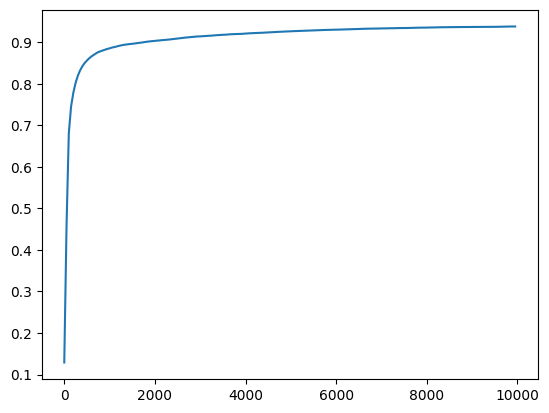

In [54]:
plt.plot(eps, accs)
plt.show()

In [55]:
Z1, A1, Z2, A2 = forward_pass(weight_1, bias_1, weight_2, bias_2, X_test)
print(accuracy(predictions(A2), Y_test))

ValueError: shapes (10,784) and (783,28000) not aligned: 784 (dim 1) != 783 (dim 0)